In [5]:
from datareader import DLEMDataset
from util import convert_diags_to_full_contact
import util
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [6]:
from models.encodetocontact_1d_out import DLEM

In [7]:
import torch

In [8]:
BATCH_SIZE = 4 

In [9]:
GENOME_FILE = "/data/genomes/human/Homo_sapiens/UCSC/hg38/Sequence/WholeGenomeFasta/genome.fa"

In [10]:
data = DLEMDataset(".data/dlem_training")
#data = DLEMDataset("../loopextrusion_data_creation/.data/training_data_res_1000_patch_size_500", GENOME_FILE)

In [11]:
data[0]

(array([-0.05781007,  0.08615452,  0.32369992, ...,  1.306203  ,
         2.155142  ,  1.8021954 ], dtype=float32),
 array([[ 1.3301321e+00,  3.1535816e+00,  1.6833463e-01, ...,
         -2.1051429e-01,  8.8557765e-02, -4.4288495e-01],
        [ 5.8746517e-01,  3.6763862e-01,  4.4430122e-01, ...,
         -3.4145214e-02,  1.8767029e-03,  2.4968268e-02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
 tensor([[0, 0, 0, 1],
         [0, 1, 0, 0],
         [0, 1, 0, 0],
         ...,
         [0, 0, 1, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 1]]))

In [6]:
model = DLEM(data.patch_dim, data.feature_dim, data.start_diag, data.stop_diag)

In [7]:
index_diagonal = util.diag_index_for_mat(data.patch_dim, data.start_diag, data.stop_diag)

In [8]:
mat = convert_diags_to_full_contact(data[0][0], data.start_diag, data.stop_diag)

In [9]:
data[0][0].shape, data[0][1].shape

((118703,), (4, 500))

In [10]:
test_fold = 'fold4'
val_fold = 'fold5'

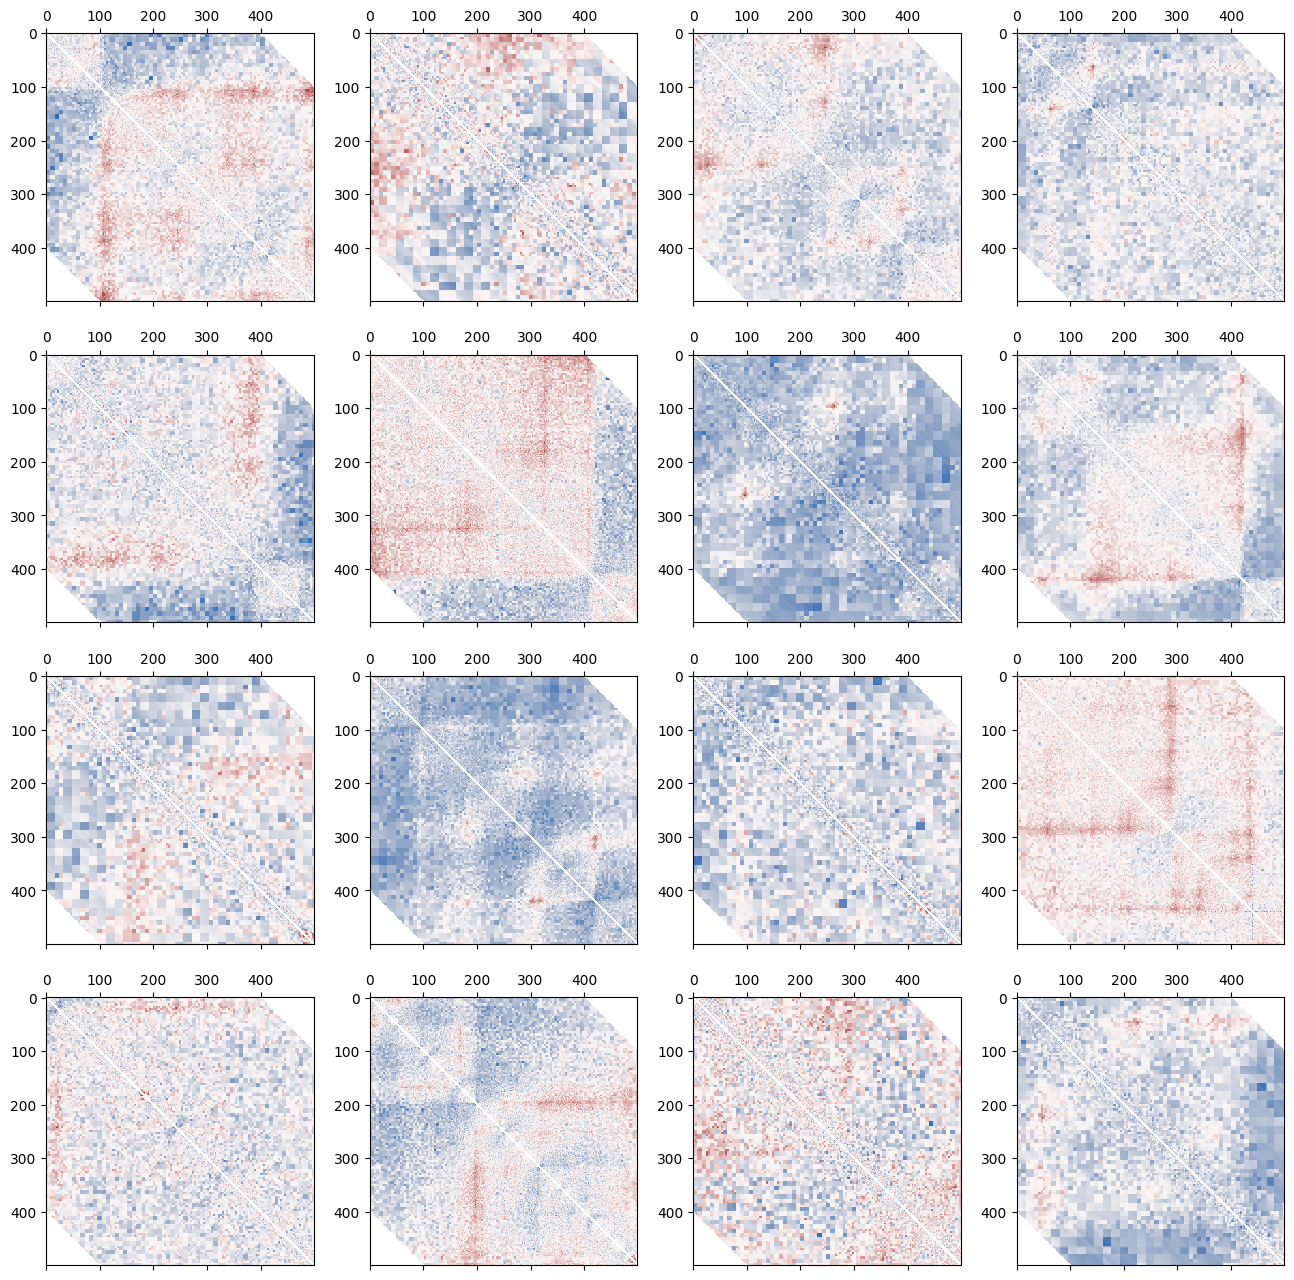

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    ax.matshow(convert_diags_to_full_contact(data[-i][0], data.start_diag, data.stop_diag), cmap="vlag") 

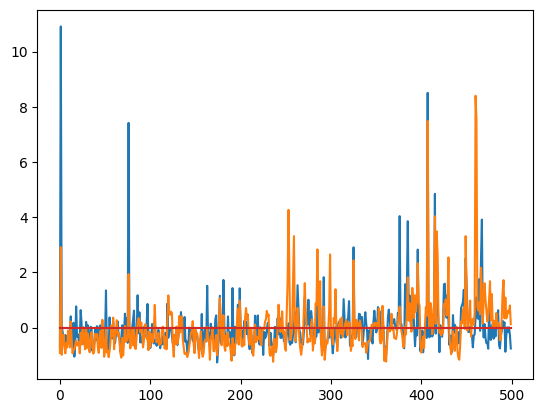

In [12]:
plt.plot(data[-5][1].T)

In [13]:
data.data_folds

array(['fold0', 'fold0', 'fold0', ..., 'fold7', 'fold7', 'fold7'],
      dtype=object)

In [14]:
data_test = torch.utils.data.Subset(data, np.where(data.data_folds == test_fold)[0])
data_val = torch.utils.data.Subset(data, np.where(data.data_folds == val_fold)[0])
data_train = torch.utils.data.Subset(data, np.where(np.logical_and(data.data_folds != val_fold,
                                                                   data.data_folds != test_fold))[0])

In [15]:
dataloader_test = torch.utils.data.DataLoader(data_test, batch_size = BATCH_SIZE, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(data_val, batch_size = BATCH_SIZE, shuffle=True)
dataloader_train = torch.utils.data.DataLoader(data_train, batch_size = BATCH_SIZE, shuffle=True)

In [16]:
batch = next(iter(dataloader_test))

In [17]:
batch[1].dtype

torch.float32

In [18]:
len(index_diagonal(6))

494

In [19]:
batch[1].shape

torch.Size([4, 4, 500])

In [20]:
model(batch[1], torch.exp(batch[0][:, index_diagonal(5)]), 5).flatten().shape

torch.Size([1976])

In [21]:
util.mat_corr(model(batch[1], torch.exp(batch[0][:, index_diagonal(5)]), 5), batch[0][:,index_diagonal(6)])

tensor(0.2498, grad_fn=<SelectBackward0>)

In [22]:
out = model.contact_map_prediction(batch[1],
                             torch.from_numpy(np.ones((batch[1].shape[0], data.patch_dim), dtype=np.float32) * data.patch_dim))

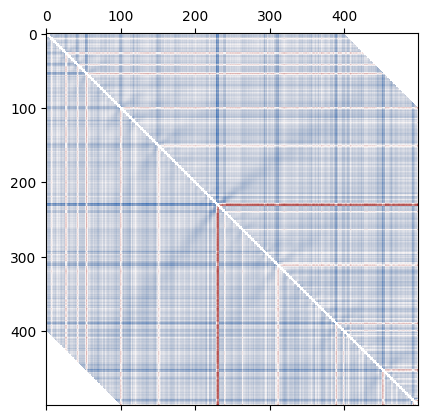

In [23]:
plt.matshow(convert_diags_to_full_contact(out[0], data.start_diag, data.stop_diag), cmap="vlag") 

In [24]:
batch[0]

tensor([[ 0.3694,  0.2749, -0.1419,  ...,  0.1799,  0.1799,  0.1799],
        [ 0.1978,  0.3051, -0.0767,  ..., -0.1856, -0.1856, -0.1856],
        [ 0.2045,  0.1288, -0.0700,  ...,  0.0354,  0.0354,  0.0354],
        [ 0.1222,  0.1285,  0.0756,  ...,  0.3700,  0.3700,  0.3700]])